Najpierw w konsoli: 
pip install -r requirements.txt

In [ ]:
from huggingface_hub import hf_hub_download
from huggingface_hub import login
import matplotlib.pyplot as plt
from datasets import load_dataset
from PIL import Image
import numpy as np

In [2]:
# stworzyć konto na hugging face, logowanie przy użyciu utworzonego tokena
login()

In [ ]:
ds = load_dataset("mertcobanov/animals")  # WA: jeśli wyrzuca brak uprawnień, uruchomić tą komórkę jeszcze raz

Resolving data files:   0%|          | 0/5400 [00:00<?, ?it/s]

In [4]:
# zamiana na obiekt DataFrame - imo łatwiejsza praca
df = ds['train'].to_pandas()

In [5]:
# 90 klas oznaczonych numerami, trzeba ręcznie zamienić
unique_labels = set(df['label'])
print(len(unique_labels))
unique_labels

90


{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89}

In [6]:
# słownik mapujący etykiety liczbowe na słowne
name_change = {
0: 'antelope'         ,
1: 'badger'           ,
2: 'bat'              ,
3: 'bear'             ,
4: 'bee'              ,
5: 'beetle'           ,
6: 'bison'            ,
7: 'boar'             ,
8: 'butterfly'        ,
9: 'cat'              ,
10: 'caterpillar'     ,
11: 'chimpanzee'      ,
12: 'cockroach'       ,
13: 'cow'             ,
14: 'coyote'          ,
15: 'crab'            ,
16: 'crow'            ,
17: 'deer'            ,
18: 'dog'             ,
19: 'dolphin'         ,
20: 'donkey'          ,
21: 'dragonfly'       ,
22: 'duck'            ,
23: 'eagle'           ,
24: 'elephant'        ,
25: 'flamingo'        ,
26: 'fly'             ,
27: 'fox'             ,
28: 'goat'            ,
29: 'goldfish'        ,
30: 'goose'           ,
31: 'gorilla'         ,
32: 'grasshopper'     ,
33: 'hamster'         ,
34: 'hare'            ,
35: 'hedgehog'        ,
36: 'hippopotamus'    ,
37: 'hornbill'        ,
38: 'horse'           ,
39: 'hummingbird'     ,
40: 'hyena'           ,
41: 'jellyfish'       ,
42: 'kangaroo'        ,
43: 'koala'           ,
44: 'ladybugs'        ,
45: 'leopard'         ,
46: 'lion'            ,
47: 'lizard'          ,
48: 'lobster'         ,
49: 'mosquito'	      ,
50: 'moth'	          ,
51: 'mouse'           ,
52: 'octopus'	      ,
53: 'okapi'           ,
54: 'orangutan'       ,
55: 'otter'           ,
56: 'owl'             ,
57: 'ox'              ,
58: 'oyster'          ,
59: 'panda'	          ,
60: 'parrot'	      ,
61: 'pelecaniformes',	
62: 'penguin'	      ,
63: 'pig'	          ,
64: 'pigeon'          ,
65: 'porcupine'	      ,
66: 'possum'          ,
67: 'raccoon'	      ,
68: 'rat'	          ,
69: 'reindeer'	      ,
70: 'rhinoceros'      ,
71: 'sandpiper'       ,
72: 'seahorse'        ,
73: 'seal'            ,
74: 'shark'           ,
75: 'sheep'	          ,
76: 'snake'	          ,
77: 'sparrow'	      ,
78: 'squid'	          ,
79: 'squirrel'	      ,
80: 'starfish'        ,
81: 'swan'            ,
82: 'tiger'	          ,
83: 'turkey'          ,
84: 'turtle'          ,
85: 'whale'	          ,
86: 'wolf'            ,
87: 'wombat'	      ,
88: 'woodpecker'	  ,
89: 'zebra'           ,
}

In [7]:
df['label'] = df['label'].map(name_change)
df

,image,label
0,"{'bytes': None, 'path': 'C:\Users\sebex\.cache...",antelope
1,"{'bytes': None, 'path': 'C:\Users\sebex\.cache...",antelope
2,"{'bytes': None, 'path': 'C:\Users\sebex\.cache...",antelope
3,"{'bytes': None, 'path': 'C:\Users\sebex\.cache...",antelope
4,"{'bytes': None, 'path': 'C:\Users\sebex\.cache...",antelope
...,...,...
5395,"{'bytes': None, 'path': 'C:\Users\sebex\.cache...",zebra
5396,"{'bytes': None, 'path': 'C:\Users\sebex\.cache...",zebra
5397,"{'bytes': None, 'path': 'C:\Users\sebex\.cache...",zebra
5398,"{'bytes': None, 'path': 'C:\Users\sebex\.cache...",zebra


In [8]:
df.iloc[1]["image"]

{'bytes': None,
 'path': 'C:\\Users\\sebex\\.cache\\huggingface\\hub\\datasets--mertcobanov--animals\\snapshots\\cfafe186d34b9cf24e232b58c3423aab055a917c\\animals\\antelope\\03d7fc0888.jpg'}

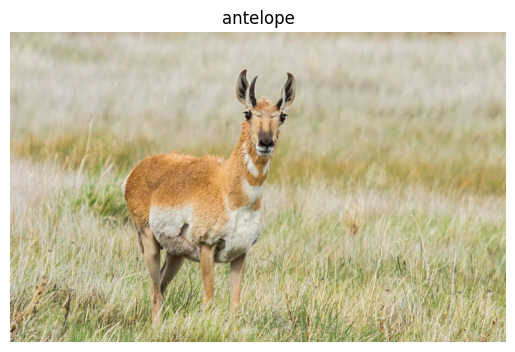

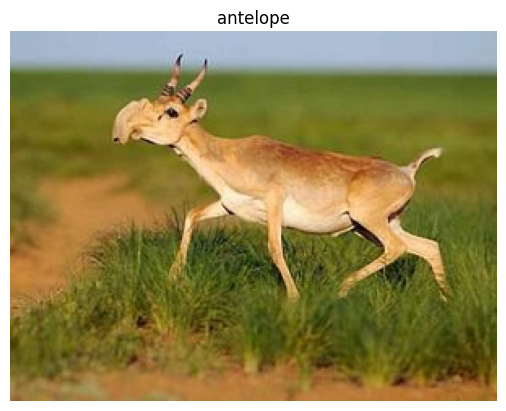

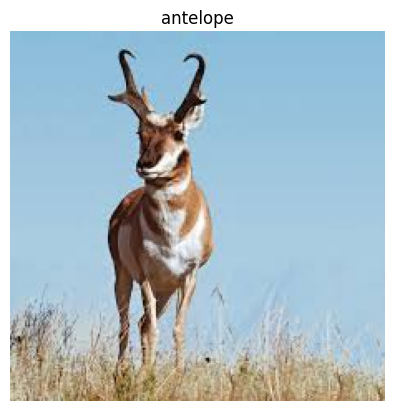

In [9]:
# podgląd kilku przykładowych zdj.

x = 3
imgs = df['image'][:x]
labels = df['label'][:x]

for i, img_info in enumerate(imgs):
    image_path = img_info['path']
    image = Image.open(image_path)
    plt.figure()
    plt.imshow(image)
    plt.title(labels[i])
    plt.axis('off')
    plt.show()

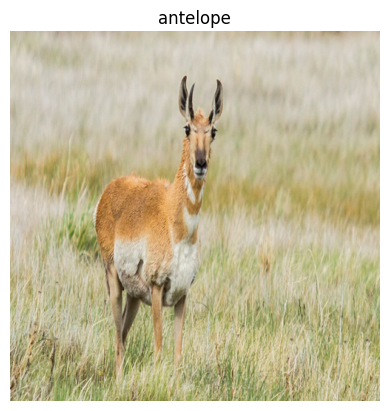

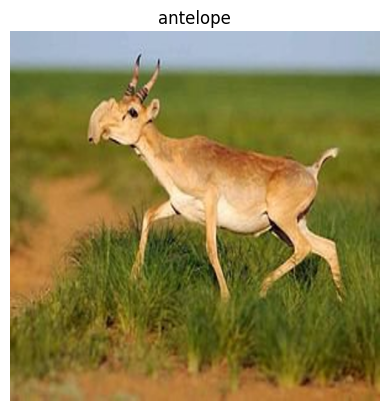

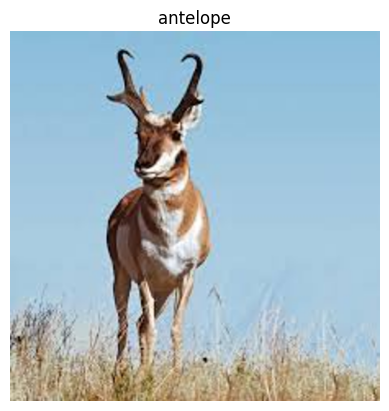

In [43]:
# Wyświetlanie wybranych zdjęć po próbnym ujednoliceniu rozmiaru i normalizacji wartości pikseli
x = 3
imgs = df['image'][:x]
labels = df['label'][:x]

for i, img_info in enumerate(imgs):
    image_path = img_info['path']
    image = Image.open(image_path)
    image = image.resize((500, 500))
    pixels = np.asarray(image).astype('float32') / 255.0
    plt.figure()
    plt.imshow(image)
    plt.title(labels[i])
    plt.axis('off')
    plt.show()

In [ ]:
# Sprawdzenie największych i najmniejszych wysokości i szerokości zdjęć
imgs_widths = []
imgs_heights = []

for i, img_info in enumerate(df['image']):
    image_path = img_info['path']
    image = Image.open(image_path)
    imgs_widths.append(image.size[0])
    imgs_heights.append(image.size[1])

print(f"Najmniejsza szerokość zdjęcia: {min(imgs_widths)}")
print(f"Największa szerokość zdjęcia: {max(imgs_widths)}")
print(f"Najmniejsza wysokość zdjęcia: {min(imgs_heights)}")
print(f"Największa wysokość zdjęcia: {max(imgs_heights)}")

Najmniejsza szerokość zdjęcia: 145
Największa szerokość zdjęcia: 4928
Najmniejsza wysokość zdjęcia: 120
Największa wysokość zdjęcia: 4064


In [ ]:
rescaled_images = []

for img_info in df['image']:
    rescaled_images.append(Image.open(img_info['path']).resize((500, 500)))

df['rescaled_images'] = rescaled_images

# df['path'] = [row['path'] for row in df['image']]
# df = df.assign(PIL_images = lambda x: Image.open(x['path']).resize((1000, 1000)))

In [ ]:
processed_images = []

for image in df['rescaled_images']:
    processed_images.append(np.asarray(image) / 255.0)

df['processed_images'] = processed_images

# df = df.assign(pixels = lambda x: np.asarray(x['rescaled_images']).astype('float32'))
# df = df.assign(processed_images = lambda x: np.asarray(x['rescaled_images']).astype('float32') / 255.0)

In [37]:
df

,image,label,rescaled_images,processed_images
0,"{'bytes': None, 'path': 'C:\Users\sebex\.cache...",antelope,<PIL.Image.Image image mode=RGB size=500x500 a...,"[[[0.7490196078431373, 0.7176470588235294, 0.6..."
1,"{'bytes': None, 'path': 'C:\Users\sebex\.cache...",antelope,<PIL.Image.Image image mode=RGB size=500x500 a...,"[[[0.6431372549019608, 0.7137254901960784, 0.8..."
2,"{'bytes': None, 'path': 'C:\Users\sebex\.cache...",antelope,<PIL.Image.Image image mode=RGB size=500x500 a...,"[[[0.5294117647058824, 0.7411764705882353, 0.8..."
3,"{'bytes': None, 'path': 'C:\Users\sebex\.cache...",antelope,<PIL.Image.Image image mode=RGB size=500x500 a...,"[[[0.5607843137254902, 0.4823529411764706, 0.3..."
4,"{'bytes': None, 'path': 'C:\Users\sebex\.cache...",antelope,<PIL.Image.Image image mode=RGB size=500x500 a...,"[[[0.5568627450980392, 0.3843137254901961, 0.2..."
...,...,...,...,...
5395,"{'bytes': None, 'path': 'C:\Users\sebex\.cache...",zebra,<PIL.Image.Image image mode=RGB size=500x500 a...,"[[[0.01568627450980392, 0.023529411764705882, ..."
5396,"{'bytes': None, 'path': 'C:\Users\sebex\.cache...",zebra,<PIL.Image.Image image mode=RGB size=500x500 a...,"[[[0.7450980392156863, 0.7725490196078432, 0.7..."
5397,"{'bytes': None, 'path': 'C:\Users\sebex\.cache...",zebra,<PIL.Image.Image image mode=RGB size=500x500 a...,"[[[0.6784313725490196, 0.7333333333333333, 0.6..."
5398,"{'bytes': None, 'path': 'C:\Users\sebex\.cache...",zebra,<PIL.Image.Image image mode=RGB size=500x500 a...,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."


In [39]:
# Wymiary obiektów zdjęć
df['processed_images'].iloc[0].shape

(500, 500, 3)

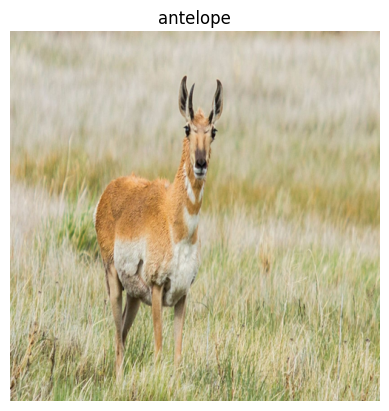

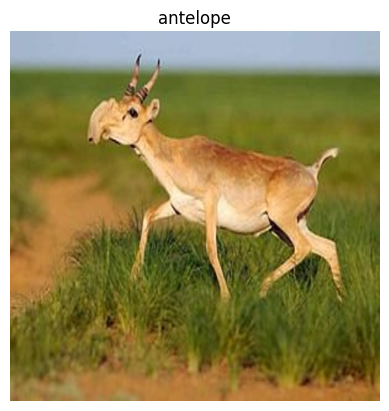

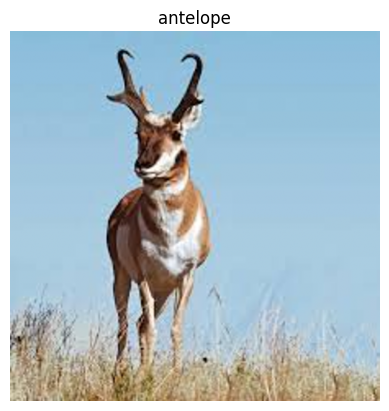

In [42]:
# Wyświetlanie wybranych zdjęć po ujednoliceniu rozmiaru i normalizacji wartości pikseli
x = 3
imgs = df['processed_images'][:x]
labels = df['label'][:x]

for i, image in enumerate(imgs):
    pixels = np.asarray(image).astype('float32') / 255.0
    plt.figure()
    plt.imshow(image)
    plt.title(labels[i])
    plt.axis('off')
    plt.show()